In [1]:
import os
import h2o
from h2o.automl import H2OAutoML

In [2]:
os.chdir('..')

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_51"; Java(TM) SE Runtime Environment (build 1.8.0_51-b16); Java HotSpot(TM) 64-Bit Server VM (build 25.51-b03, mixed mode)
  Starting server from /Users/37138/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/ff/0003j6g13lzcpwj4j090w7v9sr000f/T/tmpelamhiz2
  JVM stdout: /var/folders/ff/0003j6g13lzcpwj4j090w7v9sr000f/T/tmpelamhiz2/h2o_jpf_started_from_python.out
  JVM stderr: /var/folders/ff/0003j6g13lzcpwj4j090w7v9sr000f/T/tmpelamhiz2/h2o_jpf_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Asia/Dubai
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.11
H2O cluster version age:,4 days
H2O cluster name:,H2O_from_python_jpf_38rory
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [4]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file('ENG_DATA/SELECTED/12-10_all_train.csv')
test = h2o.import_file('ENG_DATA/SELECTED/12-10_all_test.csv')
factor_columns = ['full_address',
 'street_name',
 'type',
 'neighborhood']

#remove column index 
train.columns.remove("C1")
test.columns.remove("C1")

# Identify predictors and response
x = train.columns
y = "sale_price"
x.remove(y)
x.remove("C1")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
for f in factor_columns: 
    train[f] = train[f].asfactor()
    test[f] = test[f].asfactor()

In [6]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=5, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_3_AutoML_20191210_191049,6.72021e+10,259234,6.72021e+10,102926,0.110924
StackedEnsemble_AllModels_AutoML_20191210_191049,6.73541e+10,259527,6.73541e+10,101716,0.109657
XGBoost_1_AutoML_20191210_191049,6.80797e+10,260921,6.80797e+10,101118,0.117749
StackedEnsemble_BestOfFamily_AutoML_20191210_191049,6.82533e+10,261253,6.82533e+10,103465,0.110889
XGBoost_2_AutoML_20191210_191049,7.567e+10,275082,7.567e+10,102294,0.112254
GBM_2_AutoML_20191210_191049,8.22767e+10,286839,8.22767e+10,107861,0.122987
GBM_3_AutoML_20191210_191049,8.79275e+10,296526,8.79275e+10,113385,0.122324
GBM_4_AutoML_20191210_191049,9.2525e+10,304179,9.2525e+10,116739,nan
DRF_1_AutoML_20191210_191049,9.61054e+10,310009,9.61054e+10,122987,0.123576
GBM_1_AutoML_20191210_191049,9.80374e+10,313109,9.80374e+10,115788,nan


In [7]:
aml.training_info

{'creation_epoch': '1575990649',
 'start_epoch': '1575990649',
 'stop_epoch': '1575994259',
 'duration_secs': '3610'}

In [8]:
aml.download_mojo(path='Models/h20-leader-12-10.mojo')

'/Users/37138/cs/capstone/Models/h20-leader-12-10.mojo'

In [76]:
help(aml.leaderboard)

Help on H2OFrame in module h2o.frame object:

class H2OFrame(h2o.base.Keyed)
 |  Primary data store for H2O.
 |  
 |  H2OFrame is similar to pandas' ``DataFrame``, or R's ``data.frame``. One of the critical distinction is that the
 |  data is generally not held in memory, instead it is located on a (possibly remote) H2O cluster, and thus
 |  ``H2OFrame`` represents a mere handle to that data.
 |  
 |  Create a new H2OFrame object, possibly from some other object.
 |  
 |  :param python_obj: object that will be converted to an ``H2OFrame``. This could have multiple types:
 |  
 |      - None: create an empty H2OFrame
 |      - A list/tuple of strings or numbers: create a single-column H2OFrame containing the contents of this list.
 |      - A dictionary of ``{name: list}`` pairs: create an H2OFrame with multiple columns, each column having the
 |        provided ``name`` and contents from ``list``. If the source dictionary is not an OrderedDict, then the
 |        columns in the H2OFram

In [11]:
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20191210_191049


Model Summary: 


,,number_of_trees
0,,197.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 18345937305.28293
RMSE: 135447.17533150304
MAE: 86809.67264324015
RMSLE: 0.09819269345790534
Mean Residual Deviance: 18345937305.28293

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 67202104584.95488
RMSE: 259233.68721089256
MAE: 102926.21422125316
RMSLE: 0.11092406122966746
Mean Residual Deviance: 67202104584.95488

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,102926.43,4423.8984,98839.38,103442.61,105644.336,108527.96,98177.86
1,mean_residual_deviance,6.7202908E10,2.50175058E10,5.1936031E10,9.4783177E10,7.6031336E10,8.121172E10,3.20522895E10
2,mse,6.7202908E10,2.50175058E10,5.1936031E10,9.4783177E10,7.6031336E10,8.121172E10,3.20522895E10
3,r2,0.9598837,0.012765755,0.96751773,0.9421723,0.95536995,0.95843107,0.9759274
4,residual_deviance,6.7202908E10,2.50175058E10,5.1936031E10,9.4783177E10,7.6031336E10,8.121172E10,3.20522895E10
5,rmse,255101.9,51550.008,227894.78,307868.75,275737.8,284976.7,179031.53
6,rmsle,0.11077746,0.0063816593,0.10395187,0.113705836,0.12033176,0.10842453,0.10747331



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2019-12-10 19:44:34,3 min 18.884 sec,0.0,1.873586e+06,1.365499e+06,3.510323e+12
1,,2019-12-10 19:44:35,3 min 20.249 sec,5.0,1.476272e+06,1.058086e+06,2.179379e+12
2,,2019-12-10 19:44:36,3 min 21.227 sec,10.0,1.163593e+06,8.196989e+05,1.353948e+12
3,,2019-12-10 19:44:37,3 min 22.195 sec,15.0,9.300692e+05,6.358307e+05,8.650287e+11
4,,2019-12-10 19:44:38,3 min 23.316 sec,20.0,7.476364e+05,4.937418e+05,5.589602e+11
5,,2019-12-10 19:44:39,3 min 24.402 sec,25.0,6.044073e+05,3.843017e+05,3.653082e+11
6,,2019-12-10 19:44:40,3 min 25.523 sec,30.0,4.983726e+05,3.010613e+05,2.483753e+11
7,,2019-12-10 19:44:41,3 min 26.610 sec,35.0,4.188328e+05,2.395678e+05,1.754209e+11
8,,2019-12-10 19:44:42,3 min 27.761 sec,40.0,3.531384e+05,1.946106e+05,1.247067e+11
9,,2019-12-10 19:44:44,3 min 28.863 sec,45.0,3.067202e+05,1.632612e+05,9.407726e+10



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,orig_list_price,1.642311e+17,1.000000,0.641574
1,baths,3.923910e+16,0.238926,0.153289
2,latitude,3.162009e+16,0.192534,0.123525
3,on_market_date,4.544797e+15,0.027673,0.017754
4,area,1.756159e+15,0.010693,0.006860
5,cdom,1.669104e+15,0.010163,0.006520
6,days_on_market,1.519097e+15,0.009250,0.005934
7,sale_date,1.324455e+15,0.008065,0.005174
8,beds,1.215088e+15,0.007399,0.004747
9,on_market_year,1.187852e+15,0.007233,0.004640



See the whole table with table.as_data_frame()


In [29]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=5)  # Print all rows instead of default (10 rows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20191209_190625,3.44759e+11,587162,3.44759e+11,238006,0.207269
StackedEnsemble_AllModels_AutoML_20191209_190625,3.48333e+11,590198,3.48333e+11,239730,0.208356
XGBoost_1_AutoML_20191209_190625,3.51993e+11,593290,3.51993e+11,238027,0.209808
XGBoost_2_AutoML_20191209_190625,3.58749e+11,598956,3.58749e+11,240627,0.20972
XGBoost_grid_1_AutoML_20191209_190625_model_1,3.63377e+11,602807,3.63377e+11,254855,0.226783


In [63]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20191209_190625

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 40815719974.638336
RMSE: 202029.007755417
MAE: 119174.56159422651
RMSLE: 0.12476680410156232
R^2: 0.9770619847505104
Mean Residual Deviance: 40815719974.638336
Null degrees of freedom: 4743
Residual degrees of freedom: 4741
Null deviance: 8441435470926064.0
Residual deviance: 193629775559684.25
AIC: 129377.87720803896

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 344758889958.4855
RMSE: 587161.7238533908
MAE: 238005.73887882475
RMSLE: 0.2072693384327509
R^2: 0.8062490461964487
Mean Residual Deviance: 344758889958.4855
Null degrees of freedom: 4743
Residual degrees of freedom: 4741
Null deviance: 8443320813057156.0
Residual deviance: 1635536173963055.0
AIC: 139500.5200510587


In [12]:
preds = aml.leader.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


/Users/37138/anaconda3/lib/python3.6/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'full_address' has levels not trained on: [1 Cuvier St, San Francisco, CA 94112, 1 Del Vale Ave, San Francisco, CA 94127, 1 Edinburgh St, San Francisco, CA 94112, 1 Gabilan Way, San Francisco, CA 94132, 1 Isola Way, San Francisco, CA 94127, 1 McLaren Ave, San Francisco, CA 94121, 1 Miguel St, San Francisco, CA 94131, 1 Northwood Dr, San Francisco, CA 94112, 1 Quartz Way, San Francisco, CA 94131, 1 Raycliff Ter, San Francisco, CA 94115, 1 Silverview Dr, San Francisco, CA 94124, 1 Ventura Ave, San Francisco, CA 94116-1444, 1 West View Ave, San Francisco, CA 94134, 10 Chenery, San Francisco, CA 94131, 10 Crown Terrace, San Francisco, CA 94114-2106, 10 Cumberland St, San Francisco, CA 94110-1525, 10 De Soto, San Francisco, CA 94127, 10 Fernwood Dr, San Francisco, CA 94127-2004, 10 Imperial Ave, San Francisco, CA 94123, 10 Napier Ln, San Francisco, CA 94133, 100 Aloha Ave, San Franc

/Users/37138/anaconda3/lib/python3.6/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'views' has levels not trained on: [BAY,BYBR,DWNT,HILL, BAY,GGTE,DWNT,MNTN, BAY,GGTE,DWNT,OCEN,PARK,GRDN,TWNP, BAY,GGTE,SFRN,DWNT,TWNP, BAY,GRDN,FRST, BAY,HILL,VALY, BAY,PARK,HILL,FRST, BAY,SFRN,PARK,HILL, BAY,WOOD, CTYL,BAY,BYBR,SFRN,DWNT,MTDB, CTYL,BAY,BYBR,SFRN,DWNT,TWNP, CTYL,BAY,GGTE,DWNT,GRDN,MTPS, CTYL,BAY,GGTE,OCEN, CTYL,BAY,GGTE,PARK,HILL,TWNP, CTYL,BAY,GGTE,SFRN,HILL, CTYL,BAY,HILL,MNTN, CTYL,BAY,HILL,MTDB,RIDG,VALY, CTYL,BAY,MNTN,MTDB, CTYL,BAY,OCEN,TWNP, CTYL,BAY,SFRN,GRDN,TWNP, CTYL,BAY,SFRN,MTDB, CTYL,BAY,SFRN,PARK,HILL,CNYN, CTYL,BAY,SFRN,WOOD,HILL,TWNP, CTYL,BYBR,DWNT,PARK,MTDB, CTYL,BYBR,GGTE, CTYL,BYBR,GGTE,SFRN,GRDN, CTYL,DWNT,GRDN,FRST, CTYL,DWNT,GRDN,HILL,MNTN, CTYL,DWNT,GRDN,HILL,TWNP, CTYL,DWNT,GRDN,TWNP, CTYL,GGTE,DWNT,TWNP, CTYL,GGTE,OCEN,PARK,HILL,TWNP, CTYL,GGTE,SFRN,GRDN, CTYL,GGTE,SFRN,OCEN,PARK,GRDN,HILL,MNTN,MTPS, CTYL,GRDN,WOOD, CTYL,MNTN,RIDG, C

/Users/37138/anaconda3/lib/python3.6/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'street_name' has levels not trained on: [25th Avenue North , 41st , 48th , Alpha , Alviso , Ankeny , Arbor , Armstrong , Arroyo , August , Bache , Balhi Ct, Bay , Bitting , Bowman Ct, Broad , Brumiss Ter, Byxbee , Camellia Ave, Camellia St, Ceres , Chicago , Chula , Clarendon , Cleo Rand , Collins , Coso St, Cottage Row , Day , De Soto , Detroit , Diana St, Digby St, Ellert , Eucalyptus , Eugenia , Forest Side , Forest View , Garfield , Garrison , Gates , Gillette Ave, Glenbrook , Gold Mine St, Grand View Ter, Greenwich Ct, Haight , Harriet St, Havelock Ave, Hayes , Howth , Hudson , Inverness , Isola Way, Jefferson , Jerrold , Kalmanovitz St, Kirkham Ave, Kirkwood St, Knott Ct, Lakeview Dr, Latona , Le Conte , Linda , Lippard , Lyndhurst Dr, Macedonia St, Macondray Ln, Madrid Sq, Majestic , Marcela , Marview , Maywood , McLaren Ave, Meacham Pl, Melrose , Mersey St, Mirabel , M

In [13]:
preds['sale_price'] = test['sale_price']

In [23]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
import numpy as np

In [29]:
models = {}

In [30]:
def getMetrics(name, y_pred_, y_test_):
    metrics = {
        "r2": r2_score(y_pred_, y_test_), 
        "mean_absolute_error": mean_absolute_error(y_pred_, y_test_) / np.mean(y_test_), 
        "median_absolute_error" :median_absolute_error(y_pred_, y_test_) / np.mean(y_test_),
        "mean_abs_perc_error" : np.mean(np.abs((y_pred_ - y_test_) / y_test_)) * 100
    }
    models[f"{name}"] = metrics

In [31]:
getMetrics("12-10-all-automl", df_pred["predict"], df_pred["sale_price"])

In [32]:
models

{'12-10-all-automl': {'r2': 0.9669572425163331,
  'mean_absolute_error': 0.0741511405465754,
  'median_absolute_error': 0.039920145619098436,
  'mean_abs_perc_error': 7.6138036271989025}}

In [15]:
df_pred = preds.as_data_frame()

In [16]:
df_pred

,predict,sale_price
0,6.712208e+05,665000
1,1.162479e+06,1100000
2,7.236932e+05,700000
3,2.945670e+06,2925000
4,1.476744e+06,1425000
...,...,...
4739,2.510536e+06,2350000
4740,1.641586e+06,1505000
4741,1.905196e+06,1900000
4742,1.332332e+06,1268000


In [17]:
r2_score(df_pred["predict"], df_pred["sale_price"])

0.9669572425163331

In [20]:
df_pred["pct_err"] = ((df_pred["predict"] - df_pred["sale_price"]) / df_pred["sale_price"]) *100

In [21]:
df_pred["pct_err"].describe()

count    4744.000000
mean        1.391958
std        13.047760
min       -65.284841
25%        -5.040566
50%         0.276401
75%         6.171786
max       321.612756
Name: pct_err, dtype: float64

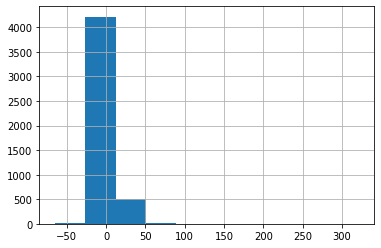

In [22]:
df_pred["pct_err"].hist()

In [90]:
df_pred.to_csv("ENG_DATA/PREDICTED/12-8_df_h20_leader_predictions.csv")

# Without List Price